# Logistic Regression


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


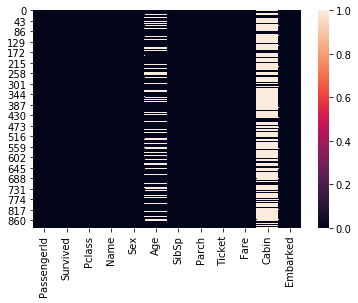

In [5]:
sns.heatmap(train.isnull())

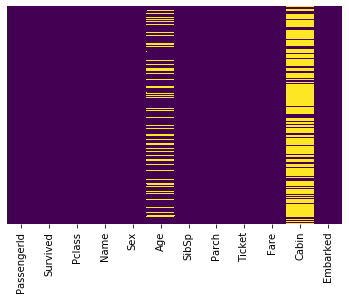

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
sns.set_style('whitegrid')

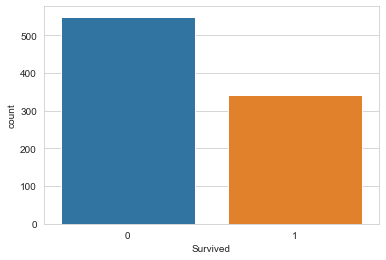

In [9]:
sns.countplot('Survived', data=train)

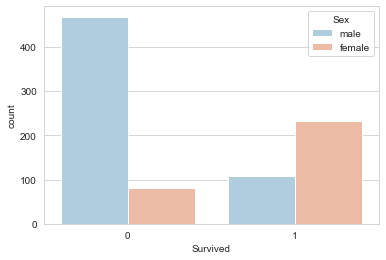

In [15]:
sns.countplot('Survived', hue='Sex', data=train, palette='RdBu_r')

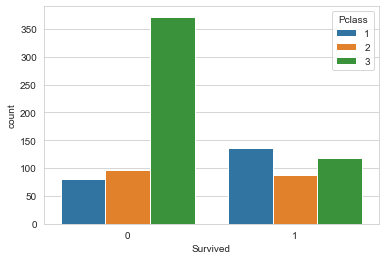

In [20]:
sns.countplot('Survived', hue='Pclass', data=train)

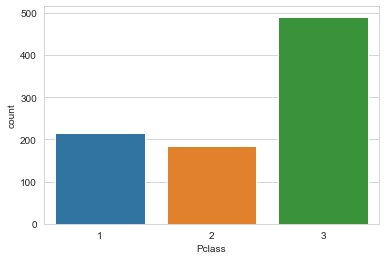

In [19]:
sns.countplot('Pclass', data=train)

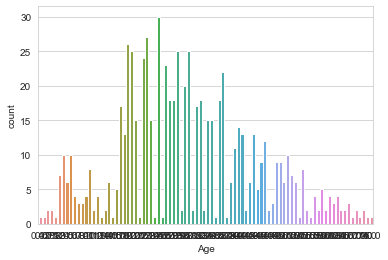

In [21]:
sns.countplot('Age', data=train)

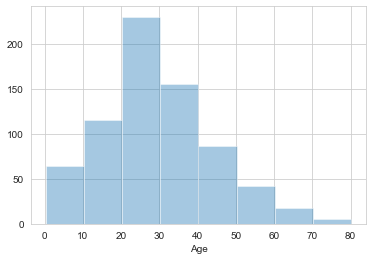

In [27]:
sns.distplot(train['Age'].dropna(), kde=False, bins=8)

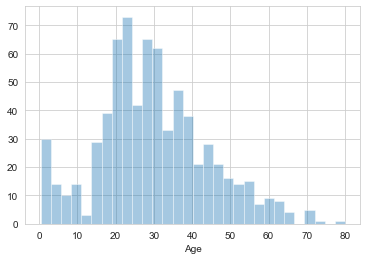

In [28]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

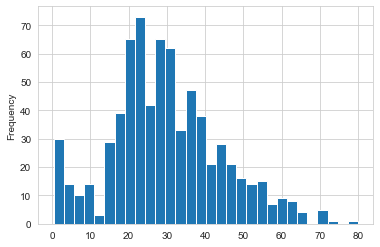

In [30]:
train['Age'].plot.hist(bins=30)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


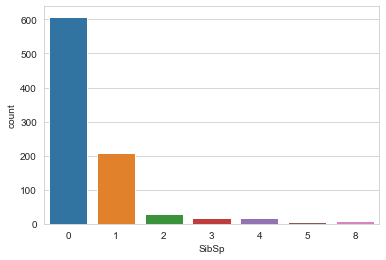

In [32]:
sns.countplot('SibSp', data=train)

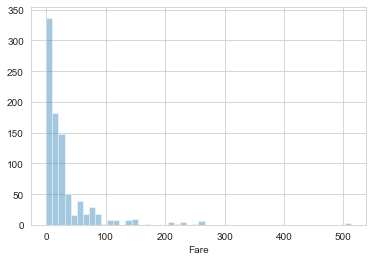

In [36]:
sns.distplot(train['Fare'], kde=False)

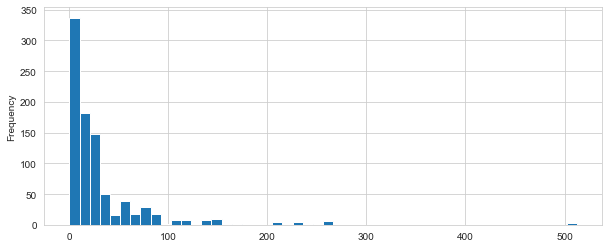

In [39]:
train['Fare'].plot.hist(bins=50, figsize=(10,4))

In [41]:
import cufflinks as cf

In [42]:
cf.go_offline()

In [45]:
# train['Fare'].iplot(kind='hist', bins=30)

### Cleaning data for Machine Learning:
Dealing with missing values of age by class

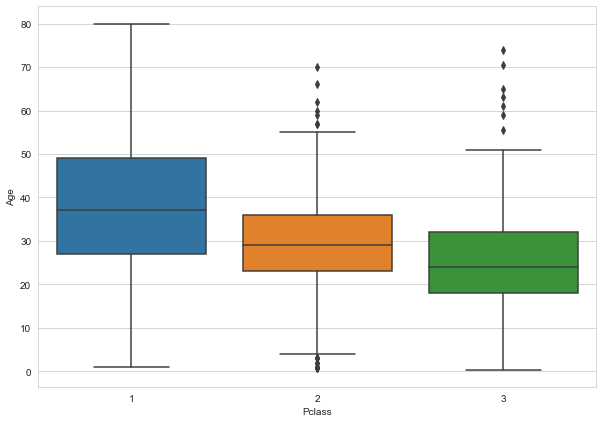

In [48]:
plt.figure(figsize=(10,7))
sns.boxplot('Pclass','Age', data=train)

In [49]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [50]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

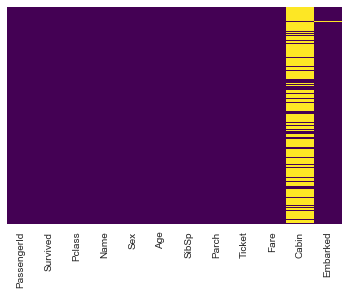

In [51]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [53]:
train.drop('Cabin', axis=1, inplace=True)

In [54]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


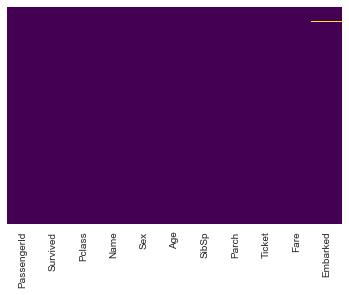

In [55]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [56]:
train.dropna(inplace=True)

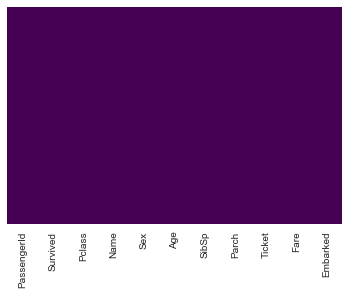

In [58]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Categorical features with dummy variable

In [59]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [61]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [62]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [66]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [67]:
train = pd.concat([train,sex,embark],axis=1)

In [68]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1


Drop unwanted columnms

In [70]:
train.drop(['PassengerId','Name','Sex','Embarked','Ticket'],axis=1, inplace=True)

### Perfect Data frame for a Machine Learning Algorithm

In [73]:
train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1


## TODO: *Parch* column
check differente leaving as a numeric column vs dummy variable

NOTE:
    For convinence train data fram will be consider as the whole data, in which needs to be splitted for the ML process,
    the proper way would be importing the test csv and cleanning it to be in the same form of the train data.

### With Parch as numeric column

In [74]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
logmodel = LogisticRegression()

In [79]:
logmodel.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
preds = logmodel.predict(X_test)

In [81]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
confusion_matrix(y_test,preds)

array([[148,  15],
       [ 36,  68]], dtype=int64)